In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GroupShuffleSplit, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ndcg_score, make_scorer

# Modeling

In [2]:
pos = pd.read_csv('pos.csv')

In [3]:
train = pd.read_csv("cleaned_train.csv")
test = pd.read_csv("cleaned_test.csv")

In [4]:
cat_features = [ "comp1_rate", "comp1_inv", "comp2_rate", "comp2_inv", "comp3_rate", "comp3_inv", "comp4_rate", "comp4_inv",
                "comp5_rate", "comp5_inv", "comp6_rate", "comp6_inv", "comp7_rate", "comp7_inv", "comp8_rate", "comp8_inv",
                "weekday", "month"]
rest = ["srch_id", "site_id", "visitor_location_country_id", "prop_country_id", "prop_id", "srch_destination_id"]

target = 'target_score' #click_bool in this case


In [5]:
# group split needed for both train-test split and CV
splitter = GroupShuffleSplit(test_size=0.1, n_splits=1, random_state = 7)
split = splitter.split(train, groups=train['srch_id'])
train_inds, test_inds = next(split)

train_df = train.iloc[train_inds]
test_df = train.iloc[test_inds]

X_train = train_df.drop([target], axis=1)
X_test = test_df.drop([target], axis=1)
y_train = train_df[target]
y_test = test_df[target]

In [6]:
gss = GroupShuffleSplit(n_splits=4, test_size=0.25)

In [7]:
custom_scorer = make_scorer(ndcg_score, k=5, greater_is_better=True)

In [10]:
y_train_ = -y_train
y_test_ = -y_test

## Manual try parameters

In [11]:
model66 = lgb.LGBMRanker(objective="lambdarank", metric="ndcg", verbose=1, num_iterations=200)

In [12]:
%%time
model66.fit(X_train, y_train_, eval_set=[(X_train, y_train_), (X_test, y_test_)], eval_group=[X_train['srch_id'].value_counts(sort=False).sort_index(), X_test['srch_id'].value_counts(sort=False).sort_index()], group=X_train['srch_id'].value_counts(sort=False).sort_index(),
            eval_at=5,categorical_feature=rest)


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['prop_country_id', 'prop_id', 'site_id', 'srch_destination_id', 'srch_id', 'visitor_location_country_id']
  warnings.warn('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.254866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54305
[LightGBM] [Info] Number of data points in the train set: 4461236, number of used features: 100


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[1]	training's ndcg@5: 0.299461	valid_1's ndcg@5: 0.292636
[2]	training's ndcg@5: 0.339943	valid_1's ndcg@5: 0.325278
[3]	training's ndcg@5: 0.352922	valid_1's ndcg@5: 0.333621
[4]	training's ndcg@5: 0.36205	valid_1's ndcg@5: 0.340558
[5]	training's ndcg@5: 0.367696	valid_1's ndcg@5: 0.346121
[6]	training's ndcg@5: 0.372135	valid_1's ndcg@5: 0.348248
[7]	training's ndcg@5: 0.37652	valid_1's ndcg@5: 0.351114
[8]	training's ndcg@5: 0.379403	valid_1's ndcg@5: 0.352944
[9]	training's ndcg@5: 0.382513	valid_1's ndcg@5: 0.354109
[10]	training's ndcg@5: 0.384195	valid_1's ndcg@5: 0.356146
[11]	training's ndcg@5: 0.387085	valid_1's ndcg@5: 0.357555
[12]	training's ndcg@5: 0.389873	valid_1's ndcg@5: 0.359794
[13]	training's ndcg@5: 0.392433	valid_1's ndcg@5: 0.360516
[14]	training's ndcg@5: 0.393826	valid_1's ndcg@5: 0.360487
[15]	training's ndcg@5: 0.397919	valid_1's ndcg@5: 0.363979
[16]	training's ndcg@5: 0.39977	valid_1's ndcg@5: 0.365685
[17]	training's ndcg@5: 0.400871	valid_1's ndcg@5: 0

[138]	training's ndcg@5: 0.495693	valid_1's ndcg@5: 0.386988
[139]	training's ndcg@5: 0.496066	valid_1's ndcg@5: 0.387077
[140]	training's ndcg@5: 0.496495	valid_1's ndcg@5: 0.387055
[141]	training's ndcg@5: 0.496934	valid_1's ndcg@5: 0.386898
[142]	training's ndcg@5: 0.497655	valid_1's ndcg@5: 0.387003
[143]	training's ndcg@5: 0.498067	valid_1's ndcg@5: 0.386671
[144]	training's ndcg@5: 0.498404	valid_1's ndcg@5: 0.386446
[145]	training's ndcg@5: 0.498834	valid_1's ndcg@5: 0.386529
[146]	training's ndcg@5: 0.499142	valid_1's ndcg@5: 0.386503
[147]	training's ndcg@5: 0.499526	valid_1's ndcg@5: 0.386362
[148]	training's ndcg@5: 0.499939	valid_1's ndcg@5: 0.386376
[149]	training's ndcg@5: 0.500508	valid_1's ndcg@5: 0.38647
[150]	training's ndcg@5: 0.50094	valid_1's ndcg@5: 0.386645
[151]	training's ndcg@5: 0.50128	valid_1's ndcg@5: 0.386563
[152]	training's ndcg@5: 0.501859	valid_1's ndcg@5: 0.386751
[153]	training's ndcg@5: 0.502314	valid_1's ndcg@5: 0.386871
[154]	training's ndcg@5: 0.

LGBMRanker(metric='ndcg', num_iterations=200, objective='lambdarank', verbose=1)

In [13]:
y_pred_66 = model66.predict(X_test)
y_pred_66

array([ 0.49892916, -0.77827307, -0.48718981, ..., -0.38726199,
        0.22071585,  0.40486471])

In [14]:
df = pd.concat([X_test["srch_id"], pos.iloc[test_inds]], axis=1)
df['predictions'] = y_pred_66
# df.head(30)

In [15]:
scores = []
for i in df['srch_id'].unique():
    a1 = [df[df["srch_id"]==i]["position"].values]
    a2 = [df[df["srch_id"]==i]["predictions"].values]
    scores.append(ndcg_score(a1, a2, k=5))
print(sum(scores)/len(scores)) #0.3733667894875733 previously

0.3733667894875733


In [16]:
model66_ = lgb.LGBMRanker(objective="lambdarank", metric="ndcg", verbose=1, num_iterations=200)

In [18]:
%%time
model66_.fit(train.drop([target], axis=1), -train[target], verbose=1,
             group=train['srch_id'].value_counts(sort=False).sort_index(),categorical_feature=rest)


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.221449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52080
[LightGBM] [Info] Number of data points in the train set: 4958347, number of used features: 100
CPU times: user 8min 15s, sys: 49.3 s, total: 9min 4s
Wall time: 3min 54s


LGBMRanker(metric='ndcg', num_iterations=200, objective='lambdarank', verbose=1)

In [19]:
%%time
y_pred66 = model66_.predict(test)
y_pred66 

CPU times: user 5min 55s, sys: 37.7 s, total: 6min 33s
Wall time: 2min 40s


array([ 0.59142269,  1.12019842, -0.25803262, ...,  0.03295955,
       -0.05237822,  0.23207979])

# Model evaluation

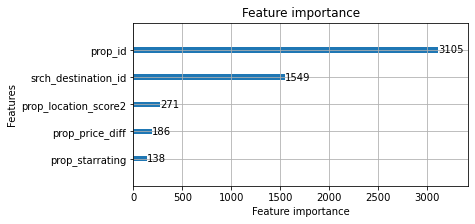

In [31]:
# feature importance
lgb.plot_importance(model66_, max_num_features=5, figsize=(6,3));
# plt.show()

# Submission

- by target_score (click_bool)

In [27]:
r = pd.DataFrame(data = -y_pred66, columns=['target_score']) #replace with y_pred7
r.head(20)

In [28]:
r["srch_id"] = test['srch_id']
r["prop_id"] = test['prop_id']

In [29]:
result = r.sort_values(['srch_id','target_score'])[["srch_id","prop_id"]]

In [30]:
# result.head(10)

In [31]:
result.to_csv("sub14.csv", index=False)

-	CatBoost https://colab.research.google.com/drive/1cuFTgBFRVFD8dVP74QkhNZ_9v7sDgx_z 

https://www.kaggle.com/code/danofer/catboost-ranking-ncdg-expedia-search-queries 
-	TF listwise https://www.tensorflow.org/ranking 